In [1]:
%cd /data/jupyter/root/ECNU/DataMining/L08-Regression/

/data/jupyter/root/ECNU/DataMining/L08-Regression


In [2]:
from __future__ import division
import os, sys

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline
import matplotlib.pyplot as plt
from numpy import nan as NA
np.random.seed(12345)
# np.set_printoptions(precision=4)
plt.rc('figure', figsize=(10, 6))
import warnings
warnings.filterwarnings('ignore')

In [3]:
def loadDataSet(file_name):
    namFeat = len(open(file_name).readline().split('\t')) -1 
    dataArr = []
    labelArr = []
    fr = open(file_name)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(namFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        labelArr.append(float(curLine[-1])) # class label
    return dataArr, labelArr

In [5]:
def standRegres(xMat, yMat):
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [4]:
def rssError(yArr_r, yArr_d):
    return ((yArr_r - yArr_d) ** 2).sum()

## 可视化

In [7]:
# 数据载入
xArr, yArr = loadDataSet('data/ex0.txt')
l = len(xArr)
l

200

In [8]:
# 训练数据
tl = int(l/2)
xMat_t = np.mat(xArr[:tl])
yMat_t = np.mat(yArr[:tl]).T
tl

100

In [9]:
# 排序
strInd = xMat_t[:, 1].argsort(0)
xSort_t = xMat_t[strInd][:, 0, :][:,1].T.A[0]
ySort_t = yMat_t.T.A[0][strInd]

NameError: name 'xSort_t' is not defined

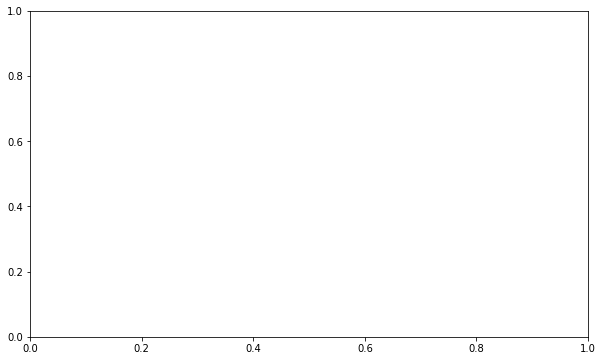

In [5]:
# 绘制训练数据
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_t, ySort_t, s=5,c='blue', label='train points')
ax.plot(xSort_t, ySort_t, c='red', label='train plot')
plt.legend(loc=4)

In [11]:
ws = standRegres(xMat_t, yMat_t)
ws

matrix([[3.00563128],
        [1.68481623]])

In [12]:
# 预测数据
xMat_i = np.mat(xArr[tl:])
yMat_r = np.mat(yArr[tl:])
yMat_d = xMat_i * ws

In [13]:
# 排序
strInd = xMat_i[:, 1].argsort(0)
xSort_i = xMat_i[strInd][:, 0, :][:,1].T.A[0]
ySort_d = yMat_d.T.A[0][strInd]
ySort_r = yMat_r.A[0][strInd]

0.7140665237618993

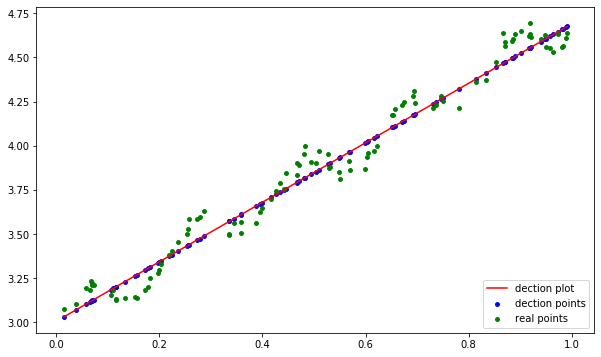

In [14]:
# 绘制预测
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_i, ySort_d, s=15,c='blue', label='dection points')
ax.scatter(xSort_i, ySort_r, s=15,c='green', label='real points')
ax.plot(xSort_i, ySort_d, c='red', label='dection plot')
plt.legend(loc=4)
rssError(ySort_r, ySort_d)

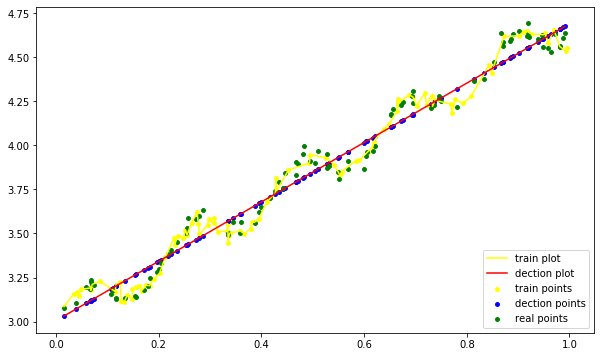

In [15]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_t, ySort_t, s=15,c='yellow', label='train points')
ax.plot(xSort_t, ySort_t, c='yellow', label='train plot')

ax.scatter(xSort_i, ySort_d, s=15,c='blue', label='dection points')
ax.scatter(xSort_i, ySort_r, s=15,c='green', label='real points')
ax.plot(xSort_i, ySort_d, c='red', label='dection plot')
plt.legend(loc=4)

## 相关系数

In [16]:
np.corrcoef(yMat_r, yMat_d.T)

array([[1.        , 0.98654988],
       [0.98654988, 1.        ]])

## 局部加权线性回归

In [17]:
def lwlr(test_point, xMat, yMat, k=1.0):
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye(m))
    for j in range(m):
        diffMat = test_point - xMat[j, :]
        weights[j, j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
#     print(weights)
    return test_point * ws

In [18]:
def lwlrTest(testArr, xArr, yArr,k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [19]:
def lwlrTestPlot(xArr, yArr, k=1.0):
    yHat = np.zeros(np.shape(yArr))
    xCopy = np.mat(xArr)
    xCopy.sort(0)
    for i in range(np.shape(xArr)[0]):
        yHat[i] = lwlr(xCopy[i], xArr, yArr, k)
    return yHat, xCopy

In [21]:
# 训练数据
tl = int(l/2)
xMat_t = np.mat(xArr[:tl])
yMat_t = np.mat(yArr[:tl]).T
tl

100

In [22]:
k = 0.02

In [30]:
# 预测数据
xMat_i = np.mat(xArr[tl:])
yMat_r = np.mat(yArr[tl:])
yMat_d = lwlrTest(xArr[tl:], xMat_t, yMat_t, k)

In [24]:
# 排序
strInd = xMat_i[:, 1].argsort(0)
xSort_i = xMat_i[strInd][:, 0, :][:,1].T.A[0]
ySort_d = yMat_d[strInd]
ySort_r = yMat_r.A[0][strInd]

Text(0.5, 1.0, 'with k = 0.02  error = 0.13397733077936255')

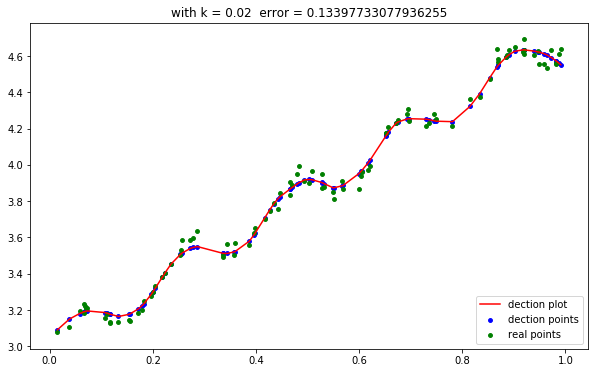

In [25]:
# 绘制预测
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_i, ySort_d, s=15,c='blue', label='dection points')
ax.scatter(xSort_i, ySort_r, s=15,c='green', label='real points')
ax.plot(xSort_i, ySort_d, c='red', label='dection plot')
plt.legend(loc=4)
re = rssError(ySort_r, ySort_d)
plt.title('with k = ' + str(k) + '  error = ' + str(re))

# 实例1

### 新数据

In [33]:
abX, abY = loadDataSet('data/abalone.txt')

In [40]:
# 训练数据
xMat_t = np.mat(abX[:99])
yMat_t = np.mat(abY[:99])

In [35]:
# 排序
strInd = xMat_t[:, 1].argsort(0)
xSort_t = xMat_t[strInd][:, 0, :][:,1].T.A[0]
ySort_t = yMat_t.A[0][strInd]

0.0

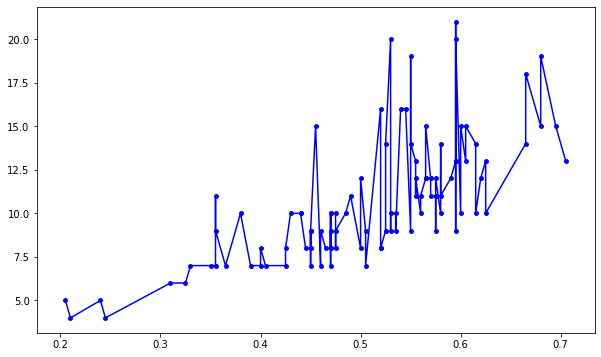

In [36]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_t, ySort_t, s=15,c='blue')
ax.plot(xSort_t, ySort_t, c='blue')
rssError(ySort_t, ySort_t)

[[1.0, 0.067732],
 [1.0, 0.42781],
 [1.0, 0.995731],
 [1.0, 0.738336],
 [1.0, 0.981083],
 [1.0, 0.526171],
 [1.0, 0.378887],
 [1.0, 0.033859],
 [1.0, 0.132791],
 [1.0, 0.138306],
 [1.0, 0.247809],
 [1.0, 0.64827],
 [1.0, 0.731209],
 [1.0, 0.236833],
 [1.0, 0.969788],
 [1.0, 0.607492],
 [1.0, 0.358622],
 [1.0, 0.147846],
 [1.0, 0.63782],
 [1.0, 0.230372],
 [1.0, 0.070237],
 [1.0, 0.067154],
 [1.0, 0.925577],
 [1.0, 0.717733],
 [1.0, 0.015371],
 [1.0, 0.33507],
 [1.0, 0.040486],
 [1.0, 0.212575],
 [1.0, 0.617218],
 [1.0, 0.541196],
 [1.0, 0.045353],
 [1.0, 0.126762],
 [1.0, 0.556486],
 [1.0, 0.901144],
 [1.0, 0.958476],
 [1.0, 0.274561],
 [1.0, 0.394396],
 [1.0, 0.87248],
 [1.0, 0.409932],
 [1.0, 0.908969],
 [1.0, 0.166819],
 [1.0, 0.665016],
 [1.0, 0.263727],
 [1.0, 0.231214],
 [1.0, 0.552928],
 [1.0, 0.047744],
 [1.0, 0.365746],
 [1.0, 0.495002],
 [1.0, 0.493466],
 [1.0, 0.792101],
 [1.0, 0.76966],
 [1.0, 0.251821],
 [1.0, 0.181951],
 [1.0, 0.808177],
 [1.0, 0.334116],
 [1.0, 0.33863],

In [49]:
# 预测数据
xMat_i = np.mat(abX[100:199])
yMat_r = np.mat(abY[100:199])
yMat_d = lwlrTest(xMat_i, xMat_t, yMat_t.T, 1)


In [50]:
# 排序
strInd = xMat_i[:, 1].argsort(0)
xSort_i = xMat_i[strInd][:, 0, :][:,1].T.A[0]
ySort_d = yMat_d[strInd]
ySort_r = yMat_r.A[0][strInd]

573.5261441897085

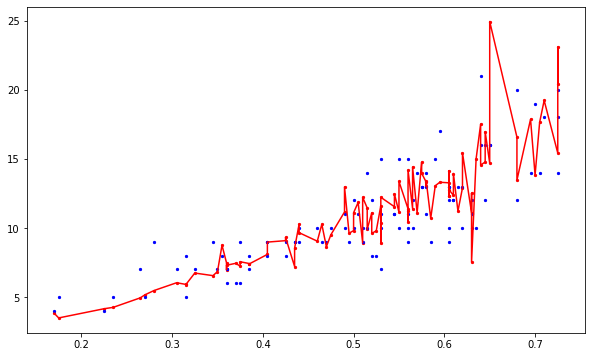

In [51]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_i, ySort_d, s=5,c='red')
ax.scatter(xSort_i, ySort_r, s=5,c='blue')
ax.plot(xSort_i, ySort_d, c='red')
rssError(ySort_r, ySort_d)

## 缩减系数来理解数据

### 岭回归

In [54]:
def ridgeRegress(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [55]:
def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMat - xMeans) / xVar
    
    numTestPts = 30
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegress(xMat, yMat, np.exp(i - 10))
        wMat[i, :] = ws.T
    return wMat    

In [56]:
abX, abY = loadDataSet('data/abalone.txt')

In [57]:
ridgeWeights = ridgeTest(abX, abY)
len(ridgeWeights)

30

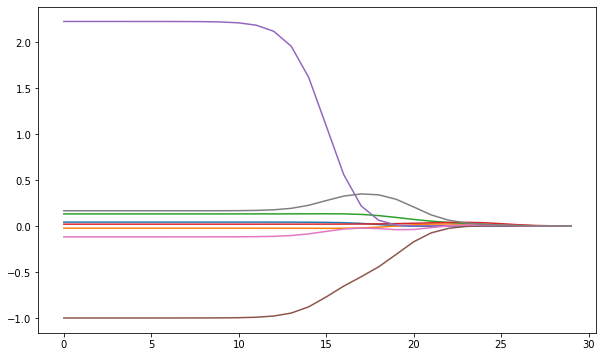

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ridgeWeights[:30])
plt.show()

In [59]:
# abX = np.array(abX)
# abY = np.array(abY)

# strInd = abX[:, 1].argsort(0)
# abX = abX[strInd]
# abY = abY[strInd]

In [60]:
# 训练数据
xMat_t = np.mat(abX[:99])
yMat_t = np.mat(abY[:99])

In [61]:
# 排序
strInd = xMat_t[:, 1].argsort(0)
xSort_t = xMat_t[strInd][:, 0, :][:,1].T.A[0]
ySort_t = yMat_t.A[0][strInd]

0.0

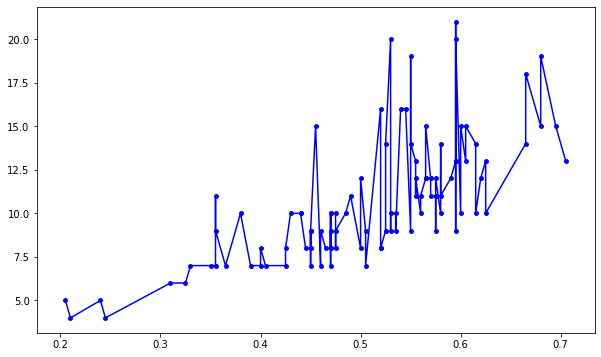

In [62]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_t, ySort_t, s=15,c='blue')
ax.plot(xSort_t, ySort_t, c='blue')
rssError(ySort_t, ySort_t)

In [63]:
# 预测数据
RGws01 = ridgeRegress(xMat_t, yMat_t.T, 0.1)
xMat_i = np.mat(abX[100:199])
yMat_r = np.mat(abY[100:199])
yMat_d = xMat_i * RGws01

In [64]:
# 排序
strInd = xMat_i[:, 1].argsort(0)
xSort_i = xMat_i[strInd][:, 0, :][:,1].T.A[0]
ySort_d = yMat_d.T.A[0][strInd]
ySort_r = yMat_r.A[0][strInd]

423.1738026377151

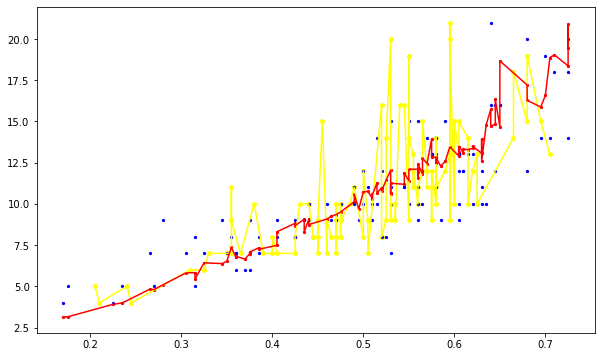

In [65]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xSort_t, ySort_t, s=15,c='yellow', label='train points')
ax.plot(xSort_t, ySort_t, c='yellow', label='train plot')

ax.scatter(xSort_i, ySort_d, s=5,c='red')
ax.scatter(xSort_i, ySort_r, s=5,c='blue')
ax.plot(xSort_i, ySort_d, c='red')
rssError(ySort_r, ySort_d)

## 向前逐步回归

In [66]:
def regulariz(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat, 0)
    inVar = np.var(inMat, 0)
    inMat = (inMat - inMeans) / inVar
    return inMat

In [67]:
# 向前逐步线性回归
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regulariz(xMat)
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))
    ws = np.zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        lowestError = np.inf
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :] = ws.T
    return returnMat

In [68]:
returnMat = stageWise(abX, abY, 0.005, 1000)
returnMat

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.045,  0.   ,  0.105, ..., -0.83 , -0.06 ,  0.26 ],
       [ 0.04 ,  0.   ,  0.105, ..., -0.83 , -0.06 ,  0.26 ],
       [ 0.045,  0.   ,  0.105, ..., -0.83 , -0.06 ,  0.26 ]])

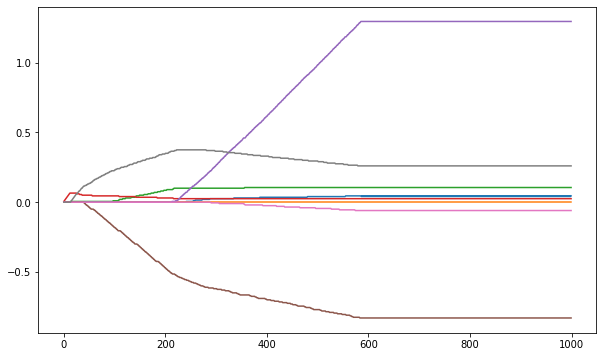

In [69]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(returnMat)
plt.show()

## Sklearn 实现线性回归就

### 最小二乘法

In [70]:
# abX = np.array(abX)
# abY = np.array(abY)

# strInd = abX[:, 1].argsort(0)
# abX = abX[strInd]
# abY = abY[strInd]


In [71]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [262]:
trainX = np.array(abX[0:99])
trainY = np.array(abY[0:99])

testX = np.array(abX[100:199])
testY = np.array(abY[100:199])

strInd = trainX[:, 1].argsort(0)
trainX = trainX[strInd]
trainY = trainY[strInd]

strInd = testX[:, 1].argsort(0)
testX = testX[strInd]
testY = testY[strInd]


In [263]:
clf.fit(trainX, trainY)
yHat = clf.predict(testX)

In [264]:
clf.score(testX, testY)

0.5300160622445143

608.5010219557844

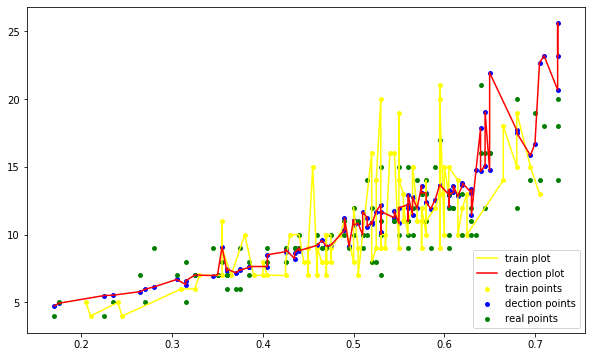

In [265]:


# yHat = yHat[strInd]
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trainX[:,1], trainY, s=15,c='yellow', label='train points')
ax.plot(trainX[:,1], trainY, c='yellow', label='train plot')

ax.scatter(testX[:,1], yHat, s=15,c='blue', label='dection points')
ax.scatter(testX[:,1], testY, s=15,c='green', label='real points')
ax.plot(testX[:,1], yHat, c='red', label='dection plot')
plt.legend(loc=4)
rssError(testY, yHat)

### 岭回归

In [76]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.5)

In [77]:
clf.fit(trainX, trainY)
yHat = clf.predict(testX)

In [78]:
clf.score(testX, testY)

0.6460413184718092

458.27995839313564

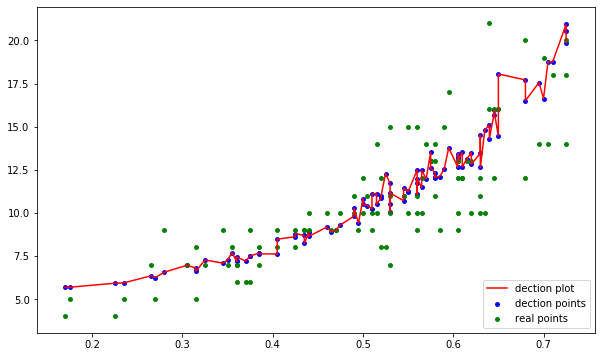

In [79]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1], trainY, c='yellow', label='train plot')

ax.scatter(testX[:,1], yHat, s=15,c='blue', label='dection points')
ax.scatter(testX[:,1], testY, s=15,c='green', label='real points')
ax.plot(testX[:,1], yHat, c='red', label='dection plot')
plt.legend(loc=4)
rssError(testY, yHat)

### Lasso线性回归

In [80]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=.1)

In [81]:
clf.fit(trainX, trainY)
yHat = clf.predict(testX)

In [82]:
clf.score(testX, testY)

0.6429962818601029

462.222450340765

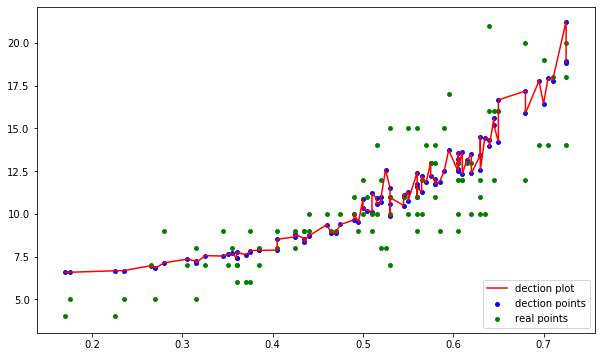

In [83]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1], trainY, c='yellow', label='train plot')

ax.scatter(testX[:,1], yHat, s=15,c='blue', label='dection points')
ax.scatter(testX[:,1], testY, s=15,c='green', label='real points')
ax.plot(testX[:,1], yHat, c='red', label='dection plot')
plt.legend(loc=4)
rssError(testY, yHat)

### ElasticNet 线性回归(不懂)

In [84]:
clf = linear_model.ElasticNet(alpha=1)

In [85]:
clf.fit(trainX, trainY)
yHat = clf.predict(testX)

In [86]:
clf.score(testX, testY)

0.18325036946617856

1057.4680216420622

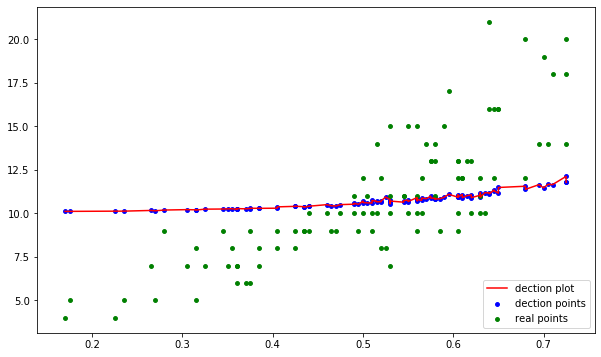

In [87]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1], trainY, c='yellow', label='train plot')

ax.scatter(testX[:,1], yHat, s=15,c='blue', label='dection points')
ax.scatter(testX[:,1], testY, s=15,c='green', label='real points')
ax.plot(testX[:,1], yHat, c='red', label='dection plot')
plt.legend(loc=4)
rssError(testY, yHat)

### SGD线性回归(不懂)

In [88]:
clf = linear_model.SGDRegressor(tol=1e-3)

In [89]:
clf.fit(trainX, trainY)
yHat = clf.predict(testX)

In [90]:
clf.score(testX, testY)

0.6438810277916694

461.0769456537313

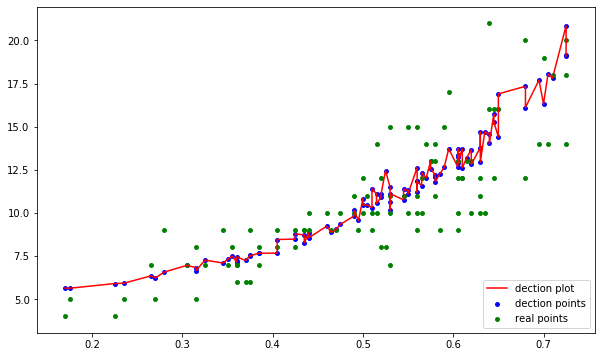

In [91]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1], trainY, c='yellow', label='train plot')

ax.scatter(testX[:,1], yHat, s=15,c='blue', label='dection points')
ax.scatter(testX[:,1], testY, s=15,c='green', label='real points')
ax.plot(testX[:,1], yHat, c='red', label='dection plot')
plt.legend(loc=4)
rssError(testY, yHat)

# 实例2

In [92]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))-2
    dataArr = []
    lonArr = []
    latArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        lineArr.append(1.0)
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        lonArr.append(float(curLine[-2])) # lon
        latArr.append(float(curLine[-1])) # lat
    return dataArr, lonArr, latArr

In [93]:
def standRegres1(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [94]:
def absError(yArr, yHatArr):
    return np.abs(yArr - yHatArr).sum()/ len(yArr)

In [169]:
dataArr, lonArr, latArr = loadDataSet('data/typhoon.dat')

In [291]:
# 数据划分
k = 0.9
tl = int(len(dataArr)* k)

trainX = np.array(dataArr[:tl])
trainY_lon = np.array(lonArr[:tl])
trainY_lat = np.array(latArr[:tl])

testX = np.array(dataArr[tl :])
testY_lon = np.array(lonArr[tl :])
testY_lat = np.array(latArr[tl :])

In [299]:
# 划分后排序（考虑划分前排序）
strInd = trainX[:, 1].argsort(0)
trainX = trainX[strInd]
trainY_lon = trainY_lon[strInd]
trainY_lat = trainY_lat[strInd]
# trainY_lat

strInd = testX[:, 1].argsort(0)
testX = testX[strInd]
testY_lon = testY_lon[strInd]
testY_lat = testY_lat[strInd]

In [306]:
wsLon = standRegres(np.mat(trainX), np.mat(trainY_lon).T)
wsLat = standRegres(np.mat(trainX), np.mat(trainY_lat).T)
wsLat

matrix([[ 4.34086330e+00],
        [-1.46360801e+03],
        [ 6.66868533e+00],
        [-1.33077278e+01],
        [ 1.46466324e+03],
        [ 6.85698296e+00],
        [ 1.30076967e+00],
        [-7.77207553e-01],
        [-3.23675352e-01],
        [ 3.27426455e+03],
        [-3.56888942e+02],
        [-7.36690686e-04],
        [-3.27217469e+03],
        [ 1.46282465e+03],
        [-1.27105415e+00],
        [ 1.79489927e-02],
        [ 1.46102636e-02]])

In [293]:
lonHatArr = (testX * wsLon).A.T[0]
latHatArr = (testX * wsLat).A.T[0]
# trainY_lon.A1.T

array([[1.        , 0.95324357],
       [0.95324357, 1.        ]])

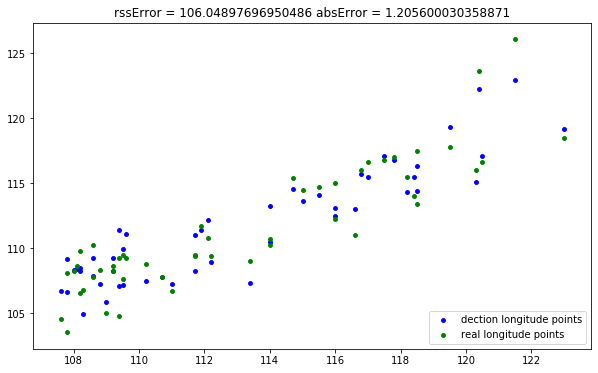

In [305]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY_lon, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1].A.T, trainY_lon.A1.T, c='yellow', label='train plot')

ax.scatter(testX[:,1], lonHatArr, s=15,c='blue', label='dection longitude points')
ax.scatter(testX[:,1], testY_lon, s=15,c='green', label='real longitude points')
# ax.plot(testX[:,1], lonHatArr, c='red', label='dection plot')

plt.legend(loc=4)


re = rssError(lonHatArr, testY_lon)
ae = absError(lonHatArr, testY_lon)
plt.title("rssError = {0} absError = {1}".format(re, ae))
np.corrcoef(lonHatArr, testY_lon)

array([[1.        , 0.84245939],
       [0.84245939, 1.        ]])

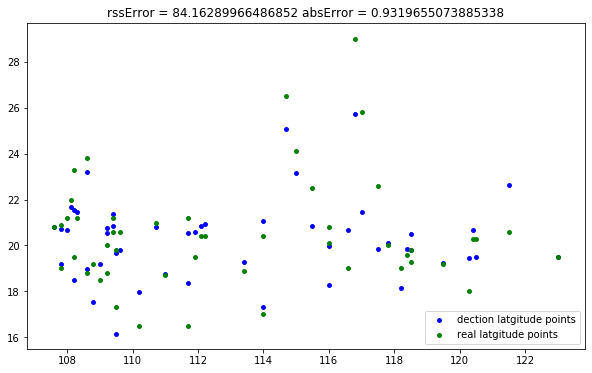

In [304]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY_lat, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1].A.T, trainY_lat.A1.T, c='yellow', label='train plot')

ax.scatter(testX[:,1], latHatArr, s=15,c='blue', label='dection latgitude points')
ax.scatter(testX[:,1], testY_lat, s=15,c='green', label='real latgitude points')
# ax.plot(testX[:,1], latHatArr, c='red', label='dection plot')

plt.legend(loc=4)


re = rssError(latHatArr, testY_lat)
ae = absError(latHatArr, testY_lat)
plt.title("rssError = {0} absError = {1}".format(re, ae))
np.corrcoef(latHatArr, testY_lat)

## 调用Sklearn

In [300]:
clf = linear_model.LinearRegression()

clf.fit(trainX, trainY_lon)
lonHatArr = clf.predict(testX)

clf.fit(trainX, trainY_lat)
latHatArr = clf.predict(testX)

array([[1.        , 0.95324357],
       [0.95324357, 1.        ]])

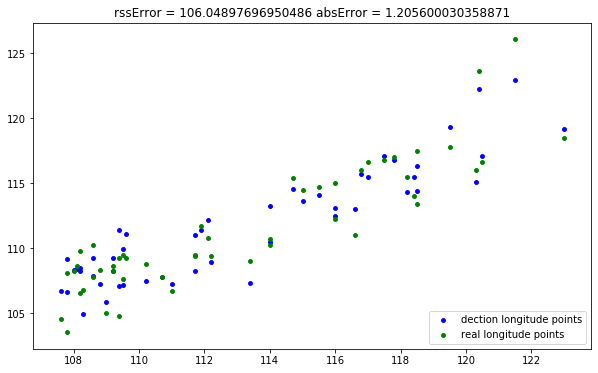

In [303]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY_lon, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1].A.T, trainY_lon.A1.T, c='yellow', label='train plot')

ax.scatter(testX[:,1], lonHatArr, s=15,c='blue', label='dection longitude points')
ax.scatter(testX[:,1], testY_lon, s=15,c='green', label='real longitude points')
# ax.plot(testX[:,1], lonHatArr, c='red', label='dection plot')

plt.legend(loc=4)


re = rssError(lonHatArr, testY_lon)
ae = absError(lonHatArr, testY_lon)
plt.title("rssError = {0} absError = {1}".format(re, ae))
np.corrcoef(lonHatArr, testY_lon)

array([[1.        , 0.84245939],
       [0.84245939, 1.        ]])

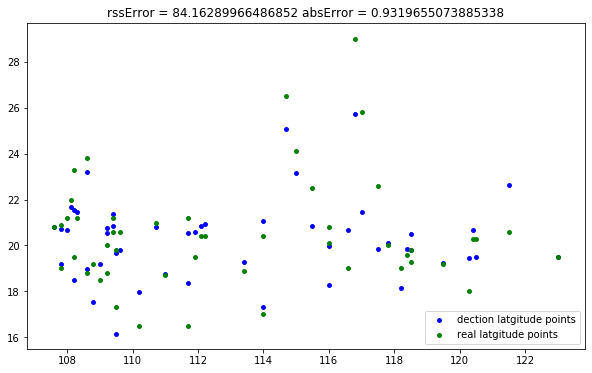

In [302]:
# 综合(含训练数据)
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter(trainX[:,1], trainY_lat, s=15,c='yellow', label='train points')
# ax.plot(trainX[:,1].A.T, trainY_lat.A1.T, c='yellow', label='train plot')

ax.scatter(testX[:,1], latHatArr, s=15,c='blue', label='dection latgitude points')
ax.scatter(testX[:,1], testY_lat, s=15,c='green', label='real latgitude points')
# ax.plot(testX[:,1], latHatArr, c='red', label='dection plot')

plt.legend(loc=4)


re = rssError(latHatArr, testY_lat)
ae = absError(latHatArr, testY_lat)
plt.title("rssError = {0} absError = {1}".format(re, ae))
np.corrcoef(latHatArr, testY_lat)